In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shwetabh123/mall-customers")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mall-customers


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score


df = pd.read_csv("/kaggle/input/mall-customers/Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:

print(df.isnull().sum())
print(f"Duplicate rows: {df.duplicated().sum()}")
if 'CustomerID' in df.columns:
    df = df.drop('CustomerID', axis=1)


label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

X = pd.DataFrame(scaled_features, columns=df.columns)
X.head()


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Duplicate rows: 0


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [5]:
print(df.columns)

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


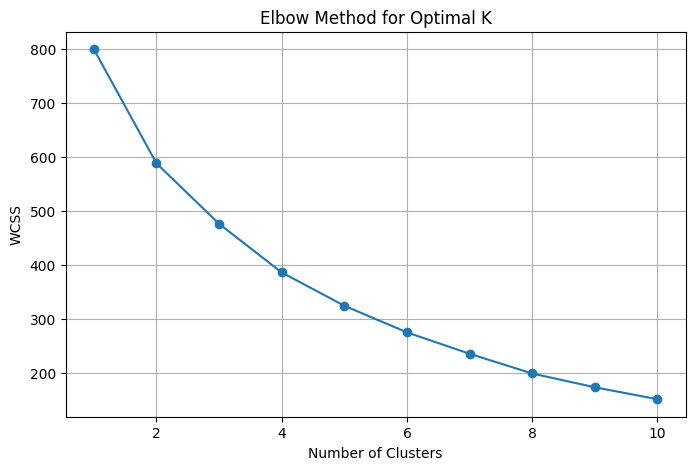

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)

# Save plot safely
import os
os.makedirs("results", exist_ok=True)  # Create folder if not exists
plt.savefig("results/elbow_plot.png", bbox_inches='tight')

plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

K=2, Silhouette Score=0.252
K=3, Silhouette Score=0.260
K=4, Silhouette Score=0.302
K=5, Silhouette Score=0.317
K=6, Silhouette Score=0.334
K=7, Silhouette Score=0.357
K=8, Silhouette Score=0.387
K=9, Silhouette Score=0.402


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=10, Silhouette Score=0.420


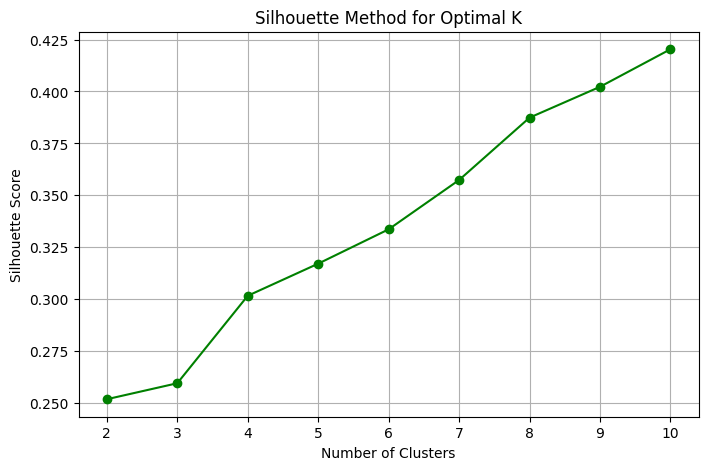

Best number of clusters: 10


In [8]:
silhouette_scores = []
K_values = range(2, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    preds = kmeans.fit_predict(X)
    score = silhouette_score(X, preds)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.3f}")

# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(K_values, silhouette_scores, marker='o', color='g')
plt.title('Silhouette Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.savefig("results/silhouette_plot.png", bbox_inches='tight')
plt.show()

# Best K
best_k = K_values[np.argmax(silhouette_scores)]
print(f"Best number of clusters: {best_k}")


In [9]:
# Train final model with best K
kmeans_final = KMeans(
    n_clusters=best_k,
    init='k-means++',
    n_init=20,
    max_iter=500,
    random_state=42
)

clusters = kmeans_final.fit_predict(X)
df['Cluster'] = clusters

# Summary
print(df.groupby('Cluster').mean())


            Genre        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        1.000000  58.846154           48.692308               39.846154
1        0.000000  27.960000           57.360000               47.120000
2        1.000000  25.250000           41.250000               60.916667
3        0.000000  43.785714           93.285714               20.642857
4        1.000000  38.473684           85.894737               14.210526
5        0.000000  54.153846           54.230769               48.961538
6        1.000000  33.277778           87.111111               82.666667
7        0.071429  41.214286           26.071429               20.142857
8        0.000000  32.190476           86.047619               81.666667
9        0.000000  25.461538           25.692308               80.538462


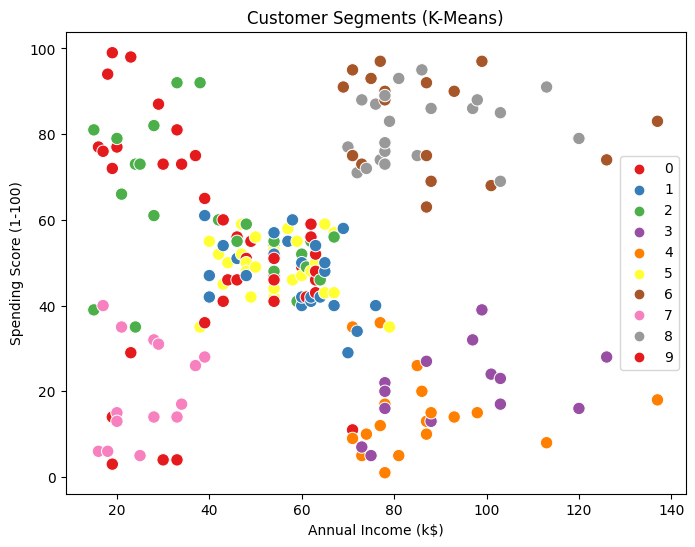

In [10]:
# Visualize clusters by Annual Income and Spending Score
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=df,
    s=80
)
plt.title('Customer Segments (K-Means)')
plt.legend()
plt.savefig("results/final_clusters.png", bbox_inches='tight')
plt.show()


In [12]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'n_clusters': range(2, 10),
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 50],
    'max_iter': [300, 500]
}

best_params = None
best_score = -1

for params in ParameterGrid(param_grid):
    kmeans = KMeans(**params, random_state=42)
    preds = kmeans.fit_predict(X)
    score = silhouette_score(X, preds)
    if score > best_score:
        best_score = score
        best_params = params

print("Best Params:", best_params)
print("Best Silhouette Score:", best_score)

Best Params: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 9, 'n_init': 50}
Best Silhouette Score: 0.40297196042062366
